<a href="https://colab.research.google.com/github/ultimatecrack/machine-learning/blob/master/Titanic_survival/Titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import warnings
warnings.simplefilter(action="ignore")

In [0]:
titanic_data = pd.read_csv('train.csv')

In [40]:
titanic_data.shape

(891, 12)

In [41]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [44]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [45]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [46]:
titanic_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [47]:
# Parent or Childs
titanic_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [48]:
# Embarked station
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Most of the passengers have embarked from "Cherbourg" & "Southampton"

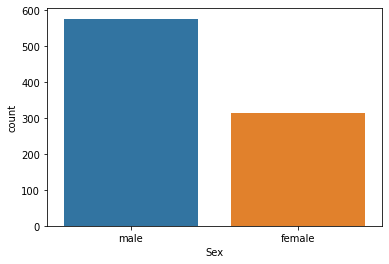

In [49]:
sns.countplot(titanic_data['Sex']);

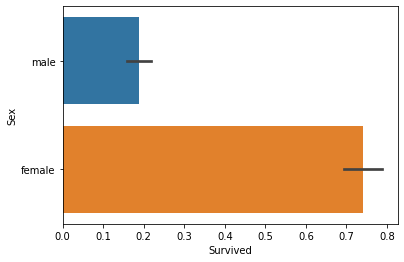

In [50]:
sns.barplot(titanic_data['Survived'], titanic_data['Sex']);

Wow !
~75% of females have survived.
Even if total number of females are less than males.
May be because, females were given more priority in lifeboats than males. May be.

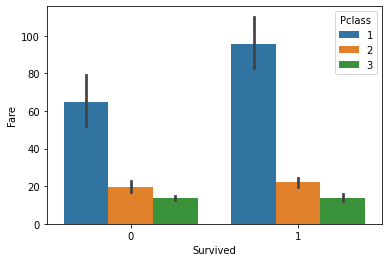

In [51]:
sns.barplot(titanic_data['Survived'], titanic_data['Fare'], titanic_data['Pclass']);

People with higher class have higher chances of survival !

#3. Preprocess data
In preprocessing step, we detect outliers & remove them from our data.
One common practice followed to detect outliers is BoxPlot.

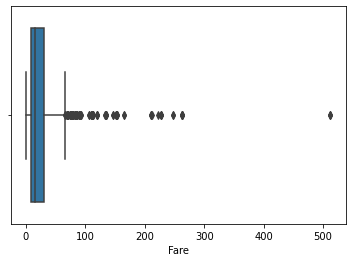

In [52]:
sns.boxplot(x=titanic_data["Fare"])
plt.show()

"""We can see, for majority of passengers, Fare price is less than 250.
So, let's only keep the rows with Fare < 250."""

In [53]:
# Only take rows which have "Fare" value less than 250.
titanic_data = titanic_data[titanic_data['Fare'] < 250]
print(titanic_data.shape)

(882, 12)


"""So, we have removed 9 rows.
Originally, there were 891 rows.
"""

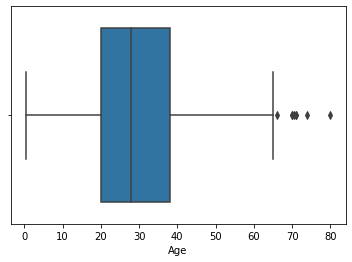

In [54]:
sns.boxplot(x=titanic_data["Age"])
plt.show()

#We can see there are some outliers in Age, but they are not much far. So, we will keep as of now.
"""Where describe method is called there you can find the count of age is less than the count of other columns 
that means there are some empty value exist. So let's check and remove it"""

3.2 Fill NaN or null values in data

In [56]:

#Let's look if there are any missing values in our data.
print(titanic_data.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64


"""There are 177 NaN values in Age & 686 NaN values in Cabin column.
In Cabin more than 75% values are empty.
So, we will just remove that column."""

In [57]:
titanic_data.drop("Cabin", axis=1, inplace=True)
print(titanic_data.shape)

print(titanic_data.columns)

(882, 11)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


"""Now, Age is a numeric column.
So, let's fill NaN values by mean of all the other non-NaN values."""

In [58]:
age_mean = titanic_data['Age'].mean()
print(age_mean)
titanic_data['Age'].fillna(age_mean, inplace=True)
titanic_data.isna().sum()

29.68818439716312


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

"""There are just 2 NaN values in Embarked column.
We handle NaN values in Embarked column by filling most occuring value in that column."""

In [59]:
titanic_data['Embarked'].value_counts()
#S is most frequently occurred so will fill na by S
titanic_data['Embarked'].fillna('S',inplace = True)

titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#3.3 Feature engineering
"""Feature Engineering is creating more meaningful data out of existing data using our domain knowledge & comman sense.
In other words, we try to create more relevant information for our ML models.
So, that our model can capture patterns in faster & better ways.
Now, this is a creative step. We need to use brain to create relevant features in the data.
Let's think."""

In [60]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.688184,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


Let's use SibSp & Parch to create a total_family_members feature.

In [0]:
titanic_data['total_family_members'] = titanic_data['Parch'] + titanic_data['SibSp'] + 1

if total family size is 1, person is alone.

In [63]:
titanic_data['is_alone'] = titanic_data['total_family_members'].apply(lambda x: 0 if x > 1 else 1)
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_family_members,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,1
5,6,0,3,"Moran, Mr. James",male,29.688184,0,0,330877,8.4583,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,2,0


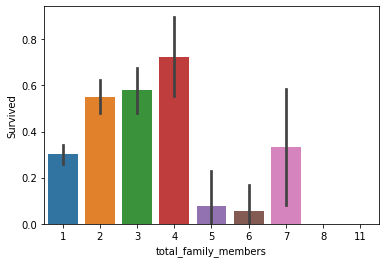

In [64]:
sns.barplot(titanic_data['total_family_members'], titanic_data['Survived'])

People with total_family_members = 4 have more than 70% chances of survival !

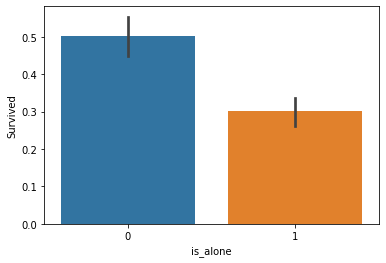

In [65]:
sns.barplot(titanic_data['is_alone'], titanic_data['Survived'])

People with family have 20% higher chance of survival than people travelling alone !!

Age column also can be used to create partitions.
We can use apply function to Age column to create new column age_group
Like..

In [66]:
def age_to_group(age):
    if 0 < age < 12:
        # children
        return 0
    elif 12 <= age < 50:
        # adult
        return 1
    elif age >= 50:
        # elderly people
        return 2
    
titanic_data['age_group'] = titanic_data['Age'].apply(age_to_group)
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_family_members,is_alone,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,1,1
5,6,0,3,"Moran, Mr. James",male,29.688184,0,0,330877,8.4583,Q,1,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,1,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,5,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,3,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,2,0,1


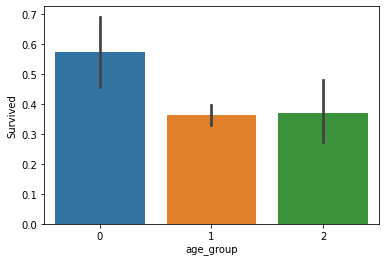

In [67]:
sns.barplot(titanic_data['age_group'], titanic_data['Survived']);

0 i.e. children have higher survival rate compared to adults & elderly people.
This data may become useful to our model.

Can you think of any way we can use name column ?
We can capture name title like Mr. Ms. Miss. etc.

In [68]:
titanic_data['name_title'] = titanic_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_family_members,is_alone,age_group,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,1,Mr


In [69]:
titanic_data['name_title'].value_counts()

Mr          513
Miss        177
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Capt          1
Ms            1
Lady          1
Mme           1
Countess      1
Sir           1
Don           1
Jonkheer      1
Name: name_title, dtype: int64

In [70]:
def clean_name_title(val):
    if val in ['Rev', 'Col', 'Mlle', 'Mme', 'Ms', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Countess', 'Capt']:
        return 'RARE'
    else:
        return val

titanic_data['name_title'] = titanic_data['name_title'].apply(clean_name_title)
titanic_data['name_title'].value_counts()

Mr        513
Miss      177
Mrs       125
Master     40
RARE       18
Dr          7
Major       2
Name: name_title, dtype: int64

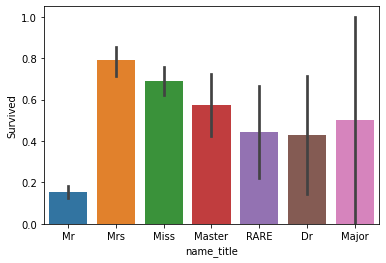

In [71]:
sns.barplot(titanic_data['name_title'], titanic_data['Survived']);

In [72]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_family_members,is_alone,age_group,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,1,1,Mr
5,6,0,3,"Moran, Mr. James",male,29.688184,0,0,330877,8.4583,Q,1,1,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,1,2,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,5,0,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,3,0,1,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,2,0,1,Mrs


In [73]:

#Let's drop columns which are not useful to us as of now.

# save the target column 
target = titanic_data['Survived'].tolist()

titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1, inplace=True)

titanic_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,total_family_members,is_alone,age_group,name_title
0,3,male,22.0,1,0,7.2500,S,2,0,1,Mr
1,1,female,38.0,1,0,71.2833,C,2,0,1,Mrs
2,3,female,26.0,0,0,7.9250,S,1,1,1,Miss
3,1,female,35.0,1,0,53.1000,S,2,0,1,Mrs
4,3,male,35.0,0,0,8.0500,S,1,1,1,Mr


#3.4 Convert all the data into numeric form

We can see, Sex, Embarked & name_title are not in numeric form.
Let's convert them via LabelEncoder from sci-kit learn.

In [74]:
le = preprocessing.LabelEncoder()
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = le.fit_transform(titanic_data['Embarked'])
titanic_data['name_title'] = le.fit_transform(titanic_data['name_title'])
titanic_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,total_family_members,is_alone,age_group,name_title
0,3,1,22.0,1,0,7.2500,2,2,0,1,4
1,1,0,38.0,1,0,71.2833,0,2,0,1,5
2,3,0,26.0,0,0,7.9250,2,1,1,1,3
3,1,0,35.0,1,0,53.1000,2,2,0,1,5
4,3,1,35.0,0,0,8.0500,2,1,1,1,4


#4. Train a machine learning model
In this step, we choose a ML model & train it one the data we have.
For this lesson, we will use basic LogisticRegression model.

But first of all, let's split our data into training & validation part.
There's train_test_split from sci-kit learn.

In [75]:
train_data, val_data, train_target, val_target = train_test_split(titanic_data, target, test_size=0.2, random_state = 0)
train_data.shape, val_data.shape, len(train_target), len(val_target)

((705, 11), (177, 11), 705, 177)

# Train the LogisticRegression model.

In [76]:
model = LogisticRegression()
model.fit(train_data, train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#5. Validate the trained model i.e. checking it's performance on unseen data.

It's called "unseen" because our ML model have never seen this data.
It's kind of a test for it.
Where it's performance will be checked on data which it have never seen or train.

In [78]:
# Predict labels on Validation data which model have never seen before.

val_predictions = model.predict(val_data)
len(val_predictions)

177

In [79]:
# first 10 values of validation_predictions
val_predictions[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [80]:
# Calculate the accuracy score on validation data.
# We already have correct target information for them.

accuracy = accuracy_score(val_target, val_predictions)
accuracy

print("We got %.3f percent accuracy on our validation unseen data !!"%(accuracy*100))
print("We are #.3f correct in predicting whether a person will survice in Titanic crash !!"%(accuracy*100))

We got 81.921 percent accuracy on our validation unseen data !!
We are #.3f correct in predicting whether a person will survice in Titanic crash !!


#6. If it performs good in validation, use model to predict future real world data.

#Lets try with Random forest classifier

In [81]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_data, train_target)
val_predictions = model.predict(val_data)
len(val_predictions)
val_predictions[:10]
accuracy = accuracy_score(val_target, val_predictions)
accuracy

0.7796610169491526

Try different types of classifier and check the accuracy